In [1]:
import tensorflow as tf
import tensorflow_io as tfio

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
from pathlib import Path

paths = list(Path("../data/input").glob("**/*.ogg"))
paths[:5]

[WindowsPath('../data/input/train_short_audio/acafly/XC109605.ogg'),
 WindowsPath('../data/input/train_short_audio/acafly/XC11209.ogg'),
 WindowsPath('../data/input/train_short_audio/acafly/XC127032.ogg'),
 WindowsPath('../data/input/train_short_audio/acafly/XC129974.ogg'),
 WindowsPath('../data/input/train_short_audio/acafly/XC129981.ogg')]

Now to do some actual signal processing and some timing to figure out how long it takes in general.

* https://www.tensorflow.org/io/tutorials/audio
* https://www.tensorflow.org/api_docs/python/tf/signal/mfccs_from_log_mel_spectrograms
* https://www.tensorflow.org/io/api_docs/python/tfio/audio/decode_vorbis

In [3]:
audio = tfio.audio.AudioIOTensor(paths[0].as_posix())
print(audio)

<AudioIOTensor: shape=[2037586       1], dtype=<dtype: 'float32'>, rate=32000>


In [4]:
from IPython.display import Audio

tensor = tf.squeeze(audio.to_tensor(), axis=[-1])
print(tensor.shape)
Audio(tensor.numpy(), rate=audio.rate.numpy())

(2037586,)


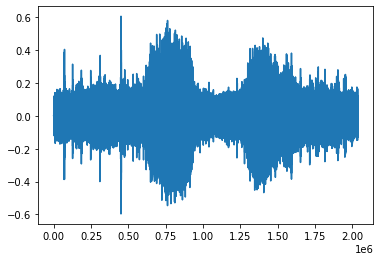

In [5]:
import matplotlib.pyplot as plt

plt.plot(tensor.numpy())

In [6]:
spectrogram = tfio.audio.spectrogram(audio.to_tensor(), nfft=512, window=512, stride=256)

plt.imshow(tf.math.log(spectrogram).numpy())

ResourceExhaustedError: OOM when allocating tensor with shape[2037586,1,257] and type complex64 on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RFFT]